In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [19]:
path = "C:\\Users\Muhammad Fahri Hamdi\OneDrive\Documents\Semester 3\Pratikum Data Mining dan Warehouse\Project\DHL_Facilities.csv"
df = pd.read_csv(path)
df.head()

,X,Y,OBJECTID,FEATURE_ID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,LATITUDE,LONGITUDE,MATCH_STATUS,PLACEMENT,CENSUS_CODE,LAST_PICKUP,LOCATION_TY,LOCATION_TH
0,-1.120834e+07,5.030051e+06,1,2093,DHL STATION,5120 EAST LEE BIRD RD,NOT AVAILABLE,NORTH PLATTE,NE,69101,41.119952,-100.686217,OK,On Road,Not Available,3:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
1,-8.043436e+06,5.299085e+06,2,2293,PC CONNECTION,450 MARLBORO ST,NOT AVAILABLE,KEENE,NH,3431,42.915280,-72.255417,OK,Not Available,330059711001024,6:30 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
2,-8.045972e+06,5.301971e+06,3,2294,20 CENTRAL SQ,20 CENTRAL SQ,NOT AVAILABLE,KEENE,NH,3431,42.934262,-72.278195,OK,Not Available,330059713003015,5:00 Pm [M-F]\r\nno Sat Pickup,Drop Box,Drop Box and Drop Off Facility
3,-8.046142e+06,5.301455e+06,4,2299,SHIPPING SHACK,63 EMERALD ST,NOT AVAILABLE,KEENE,NH,3431,42.930868,-72.279720,OK,Not Available,330059714011009,5:00 Pm [M-F]\r\nno Sat Pickup,DHL Authorized Shipping Center,DHL Authorized Shipping Center
4,-8.053022e+06,5.367961e+06,5,2597,CLAREMONT LOCK & KEY,159 PLEASANT ST,NOT AVAILABLE,CLAREMONT,NH,3743,43.366740,-72.341526,OK,Not Available,330199759022015,3:00 Pm [M-F]\r\n12:00 Pm [Sat],DHL Authorized Shipping Center,DHL Authorized Shipping Center


In [20]:
df.dtypes

X               float64
Y               float64
OBJECTID          int64
FEATURE_ID        int64
NAME             object
ADDRESS          object
ADDRESS2         object
CITY             object
STATE            object
ZIP               int64
LATITUDE        float64
LONGITUDE       float64
MATCH_STATUS     object
PLACEMENT        object
CENSUS_CODE      object
LAST_PICKUP      object
LOCATION_TY      object
LOCATION_TH      object
dtype: object

In [21]:
df.describe()

,X,Y,OBJECTID,FEATURE_ID,ZIP,LATITUDE,LONGITUDE
count,2.407200e+04,2.407200e+04,24072.000000,24072.000000,24072.000000,24072.000000,24072.000000
mean,-1.001516e+07,4.504405e+06,12036.500000,12036.816426,48782.274634,37.295641,-89.967749
std,1.644021e+06,7.143163e+05,6949.132176,6949.506833,28163.535248,5.128487,14.768493
min,-1.773961e+07,2.230536e+06,1.000000,1.000000,1001.000000,19.640879,-159.357662
25%,-1.075899e+07,3.990164e+06,6018.750000,6018.750000,28034.750000,33.711759,-96.649631
50%,-9.496394e+06,4.690440e+06,12036.500000,12036.500000,45219.000000,38.781629,-85.307562
75%,-8.915677e+06,5.031130e+06,18054.250000,18055.250000,75234.000000,41.127257,-80.090890
max,-7.551491e+06,9.569101e+06,24072.000000,24073.000000,99801.000000,64.850494,-67.836195


<Axes: xlabel='CITY'>

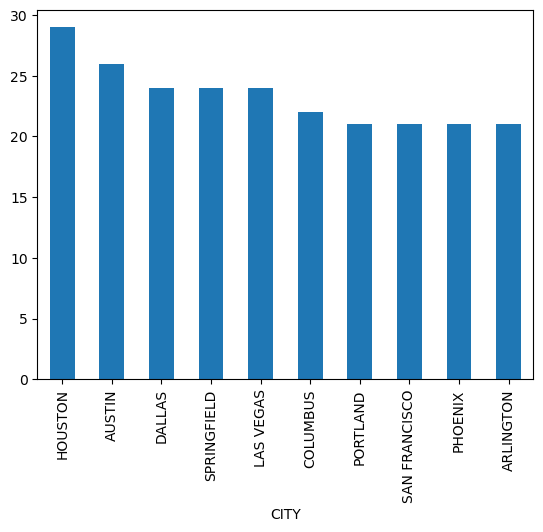

In [22]:
city_object=df.groupby('CITY').nunique()['LAST_PICKUP']
city_object.sort_values(ascending=False)[:10].plot.bar()

<Axes: ylabel='CITY'>

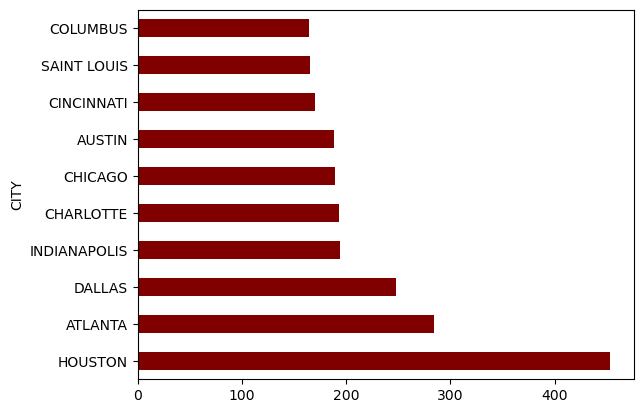

In [23]:
city_object=df.groupby('CITY').nunique()['OBJECTID']
city_object.sort_values(ascending=False)[:10].plot.barh(color='maroon')

<Axes: xlabel='STATE'>

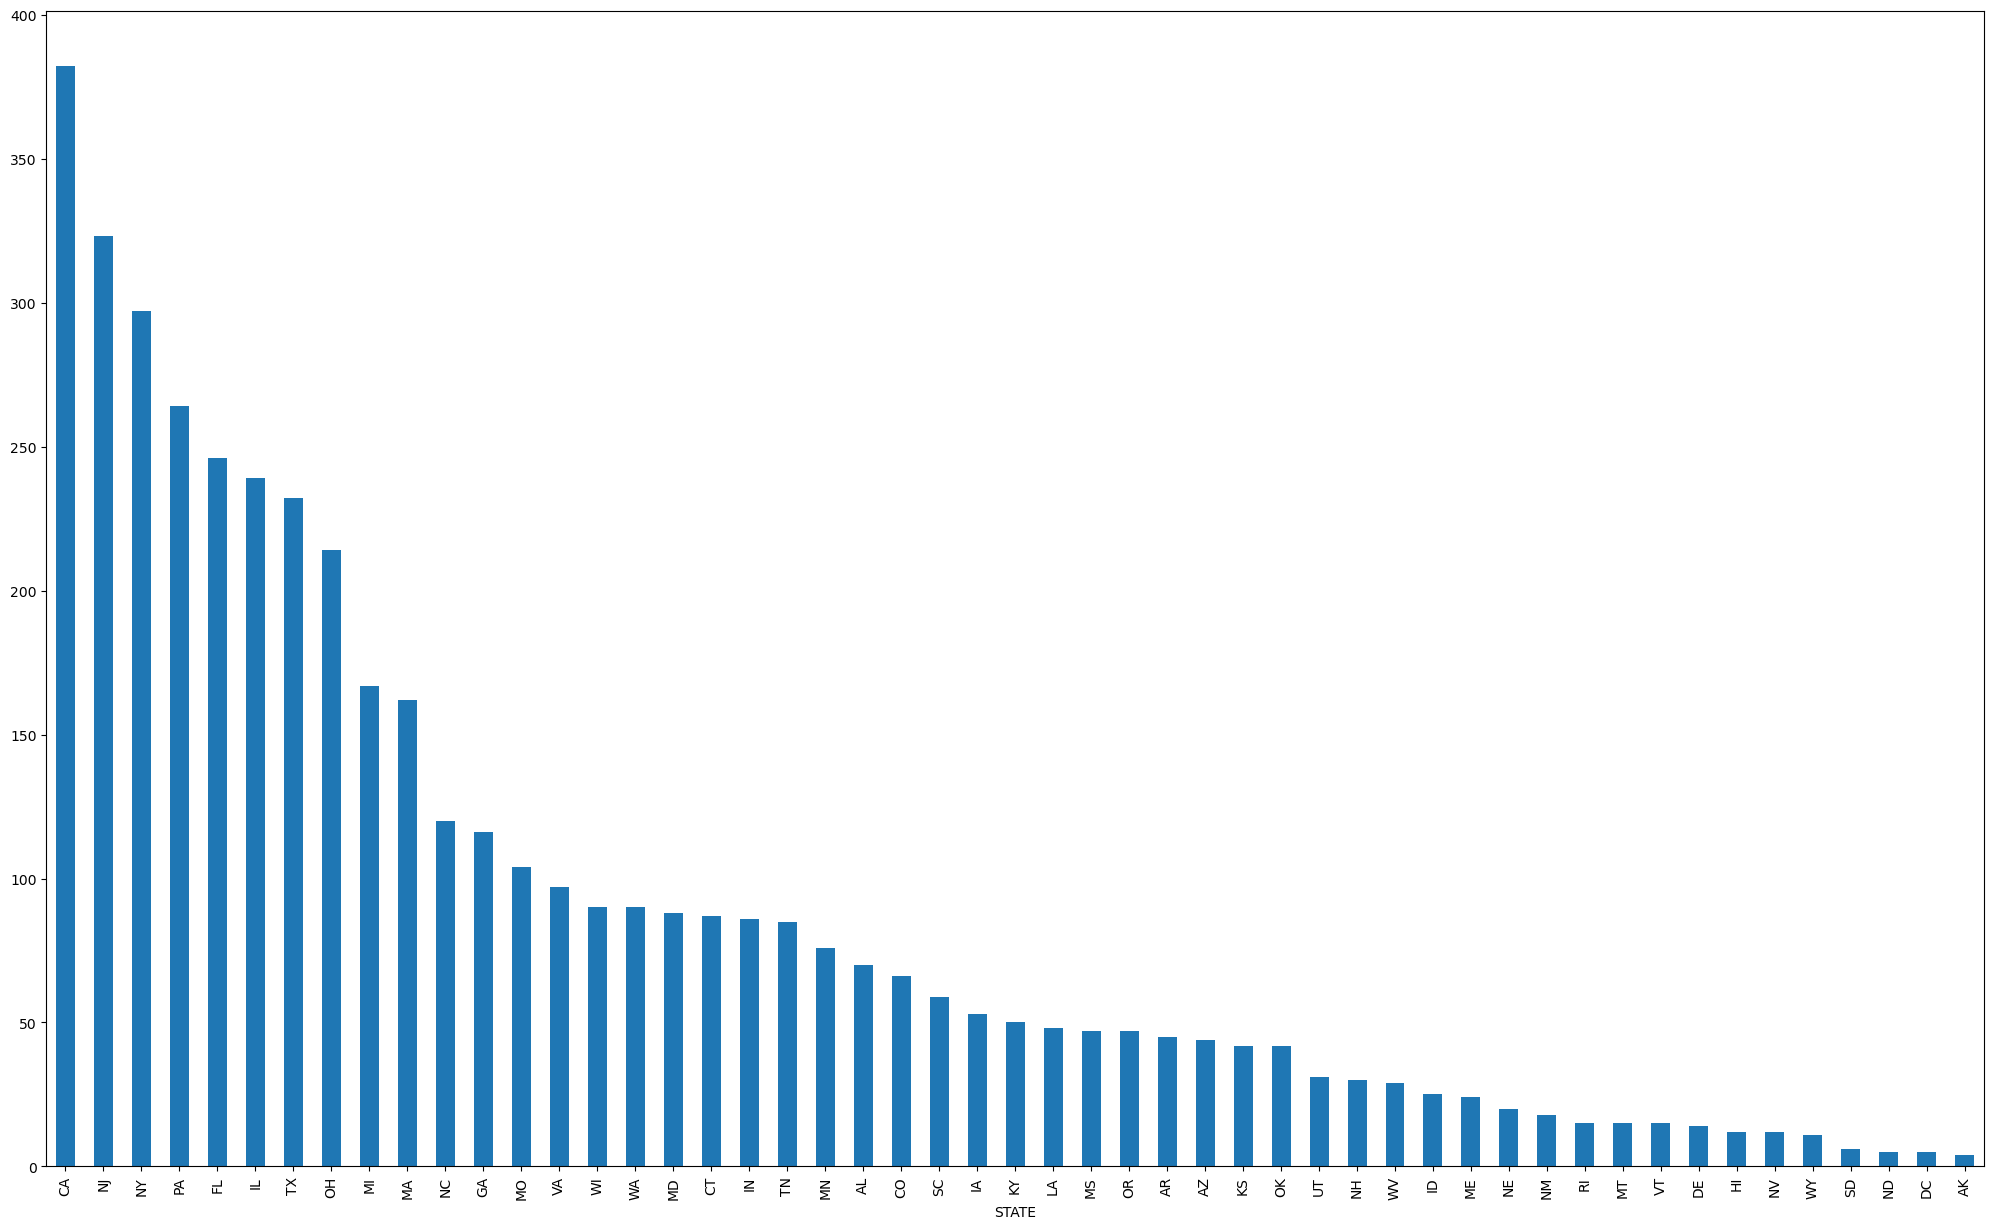

In [24]:
state_city = df.groupby('STATE').nunique()['CITY']
state_city.sort_values(ascending=False).plot.bar(figsize=(25,15))

In [25]:
df.nunique()['OBJECTID']

24072

In [26]:
df.groupby('ZIP').nunique()['OBJECTID'].sort_values(ascending=False).head(10)

ZIP
43215    44
30339    41
45202    40
30328    33
48034    31
60515    30
78759    30
60173    30
48084    29
28217    29
Name: OBJECTID, dtype: int64

In [27]:
loc=df.groupby('LOCATION_TH')
s1 = len(df[df['LOCATION_TH']=='DHL Staffed Facility'])
s2 = len(df[df['LOCATION_TH']=='DHL Authorized Shipping Center'])
s3 = len(df[df['LOCATION_TH']=='Drop Box and Drop Off Facility'])

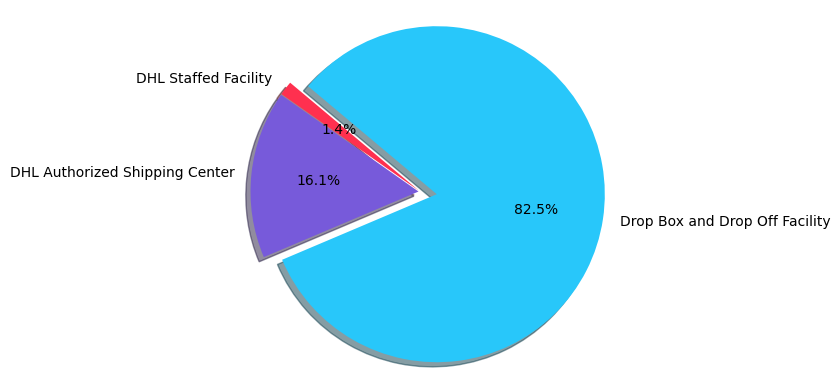

In [28]:
labels = 'DHL Staffed Facility','DHL Authorized Shipping Center','Drop Box and Drop Off Facility'
sizes = [s1,s2,s3]
colors = ['#ff304f','#775ada','#28c7fa']
explode = (0.01,0.01,0.1)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24072 entries, 0 to 24071
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             24072 non-null  float64
 1   Y             24072 non-null  float64
 2   OBJECTID      24072 non-null  int64  
 3   FEATURE_ID    24072 non-null  int64  
 4   NAME          24072 non-null  object 
 5   ADDRESS       24072 non-null  object 
 6   ADDRESS2      24072 non-null  object 
 7   CITY          24072 non-null  object 
 8   STATE         24072 non-null  object 
 9   ZIP           24072 non-null  int64  
 10  LATITUDE      24072 non-null  float64
 11  LONGITUDE     24072 non-null  float64
 12  MATCH_STATUS  24072 non-null  object 
 13  PLACEMENT     24072 non-null  object 
 14  CENSUS_CODE   24072 non-null  object 
 15  LAST_PICKUP   24072 non-null  object 
 16  LOCATION_TY   24072 non-null  object 
 17  LOCATION_TH   24072 non-null  object 
dtypes: float64(4), int64(3), o

Text(0, 0.5, 'LONGITUDE')

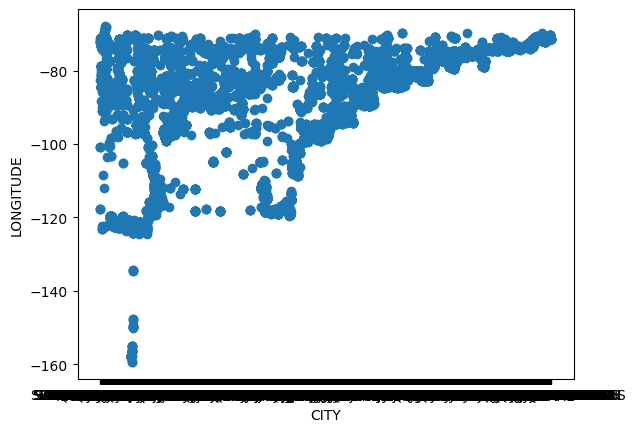

In [30]:
plt.scatter(df['CITY'], df['LONGITUDE'])
plt.xlabel('CITY')
plt.ylabel('LONGITUDE')

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(), ['CITY']),
        ('numeric', StandardScaler(), ['LONGITUDE'])
    ],
    remainder='passthrough'  # include any other columns as they are
)

df_transformed = preprocessor.fit_transform(df[['CITY', 'LONGITUDE']])

km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_transformed)

y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 1, ..., 1, 1, 1])

In [46]:
df['klaster']=y_predicted
print(df)

                  X             Y  OBJECTID  FEATURE_ID  \
0     -1.120834e+07  5.030051e+06         1        2093   
1     -8.043436e+06  5.299085e+06         2        2293   
2     -8.045972e+06  5.301971e+06         3        2294   
3     -8.046142e+06  5.301455e+06         4        2299   
4     -8.053022e+06  5.367961e+06         5        2597   
...             ...           ...       ...         ...   
24067 -7.957002e+06  5.115767e+06     24068       10603   
24068 -7.958357e+06  5.104076e+06     24069       10635   
24069 -7.958429e+06  5.076280e+06     24070       10636   
24070 -7.958210e+06  5.078219e+06     24071       10637   
24071 -7.962179e+06  5.074253e+06     24072       15589   

                         NAME                  ADDRESS       ADDRESS2  \
0                 DHL STATION    5120 EAST LEE BIRD RD  NOT AVAILABLE   
1               PC CONNECTION          450 MARLBORO ST  NOT AVAILABLE   
2               20 CENTRAL SQ            20 CENTRAL SQ  NOT AVAILABLE   

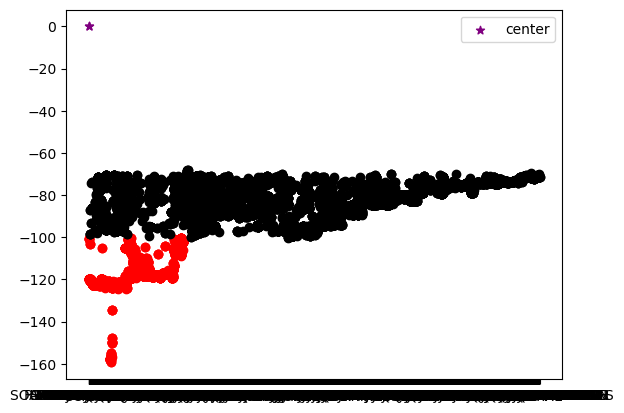

In [48]:
df1=df[df.klaster==0]
df2=df[df.klaster==1]
plt.scatter(df1['CITY'],df1['LONGITUDE'], color='red')
plt.scatter(df2['CITY'],df2['LONGITUDE'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='center')
plt.xlabel='CITY'
plt.ylabel='LONGITUDE'
plt.legend()